In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.optimizers import adam

Using TensorFlow backend.


In [142]:
train = pd.read_csv('../datasets/leaves/train.csv')
sample = pd.read_csv('../datasets/leaves/sample_submission.csv')

In [143]:
def imshow(img):
    plt.imshow(img, cmap='gray')

In [144]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [145]:
spEncoder = LabelEncoder()

In [146]:
spEncoder.fit(train.species)
train.species = spEncoder.transform(train.species)

In [147]:
train['mean_margin'] = train.ix[:, 'margin1':'margin64'].mean(axis=1)

train['mean_shape'] = train.ix[:, 'shape1':'shape64'].mean(axis=1)
train['mean_tex'] = train.ix[:, 'texture1':'texture64'].mean(axis=1)
train.ix[:, 131:].head()

,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,...,texture58,texture59,texture60,texture61,texture62,texture63,texture64,mean_margin,mean_shape,mean_tex
0,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,...,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391,0.015625,0.000464,0.015625
1,0.000000,0.007812,0.079102,0.000000,0.039062,0.000977,0.000000,0.027344,0.003906,0.000000,...,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461,0.015625,0.000591,0.015625
2,0.047852,0.008789,0.000000,0.097656,0.005859,0.003906,0.101560,0.032227,0.000000,0.000000,...,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930,0.015625,0.000720,0.015625
3,0.000977,0.007812,0.020508,0.000000,0.000000,0.013672,0.004883,0.006836,0.095703,0.015625,...,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852,0.015625,0.000445,0.015625
4,0.036133,0.003906,0.003906,0.046875,0.000000,0.041016,0.041016,0.000000,0.010742,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250,0.015625,0.000728,0.015625


In [148]:
train['max_margin'] = train.ix[:, 'margin1':'margin64'].max(axis=1)
train['max_shape'] = train.ix[:, 'shape1':'shape64'].max(axis=1)
train['max_tex'] = train.ix[:, 'texture1':'texture64'].max(axis=1)

train['min_margin'] = train.ix[:, 'margin1':'margin64'].min(axis=1)
train['min_shape'] = train.ix[:, 'shape1':'shape64'].min(axis=1)
train['min_tex'] = train.ix[:, 'texture1':'texture64'].min(axis=1)
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture64,mean_margin,mean_shape,mean_tex,max_margin,max_shape,max_tex,min_margin,min_shape,min_tex
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.025391,0.015625,0.000464,0.015625,0.066406,0.000661,0.06250,0.0,0.000367,0.0
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.022461,0.015625,0.000591,0.015625,0.054688,0.000902,0.10449,0.0,0.000433,0.0
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.002930,0.015625,0.000720,0.015625,0.109380,0.001193,0.15430,0.0,0.000484,0.0
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.047852,0.015625,0.000445,0.015625,0.085938,0.000529,0.12695,0.0,0.000324,0.0
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.031250,0.015625,0.000728,0.015625,0.083984,0.001218,0.13281,0.0,0.000299,0.0


# adding another set of feature#

In [149]:
train['sum_margin'] = train.ix[:, 'margin1':'margin64'].sum(axis=1)
train['sum_shape'] = train.ix[:, 'shape1':'shape64'].sum(axis=1)
train['sum_tex'] = train.ix[:, 'texture1':'texture64'].sum(axis=1)

train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,mean_tex,max_margin,max_shape,max_tex,min_margin,min_shape,min_tex,sum_margin,sum_shape,sum_tex
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.015625,0.066406,0.000661,0.06250,0.0,0.000367,0.0,1.000001,0.029703,0.999999
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.015625,0.054688,0.000902,0.10449,0.0,0.000433,0.0,0.999995,0.037843,0.999997
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.015625,0.109380,0.001193,0.15430,0.0,0.000484,0.0,1.000003,0.046107,1.000001
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.015625,0.085938,0.000529,0.12695,0.0,0.000324,0.0,0.999995,0.028453,0.999998
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.015625,0.083984,0.001218,0.13281,0.0,0.000299,0.0,0.999999,0.046568,0.999994


# Adding quantiles as a new feature to the dataset#

In [150]:
train['M25P'] = train.ix[:, 'margin1':'margin64'].quantile(q=0.25, axis=1)
train['S25P'] = train.ix[:, 'shape1':'shape64'].quantile(q=0.25, axis=1)
train['T25P'] = train.ix[:, 'texture1':'texture64'].quantile(q=0.25, axis=1)

train['M50P'] = train.ix[:, 'margin1':'margin64'].quantile(q=0.5, axis=1)
train['S50P'] = train.ix[:, 'shape1':'shape64'].quantile(q=0.5, axis=1)
train['T50P'] = train.ix[:, 'texture1':'texture64'].quantile(q=0.5, axis=1)

train['M75P'] = train.ix[:, 'margin1':'margin64'].quantile(q=0.75, axis=1)
train['S75P'] = train.ix[:, 'shape1':'shape64'].quantile(q=0.75, axis=1)
train['T75P'] = train.ix[:, 'texture1':'texture64'].quantile(q=0.75, axis=1)

train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,sum_tex,M25P,S25P,T25P,M50P,S50P,T50P,M75P,S75P,T75P
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.999999,0.003906,0.000414,0.000977,0.013672,0.000456,0.007812,0.023926,0.000498,0.025635
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.999997,0.003418,0.000470,0.000000,0.009766,0.000564,0.004394,0.027832,0.000690,0.023438
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,1.000001,0.001953,0.000548,0.000000,0.009766,0.000683,0.003418,0.018066,0.000864,0.016846
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.999998,0.003906,0.000418,0.000000,0.008789,0.000447,0.005371,0.024414,0.000484,0.017578
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.999994,0.001953,0.000590,0.000000,0.009766,0.000700,0.000000,0.021484,0.000894,0.021484


# Fractional Split

In [203]:
X_test = pd.DataFrame(columns=train.columns)
X_train = pd.DataFrame(columns=train.columns)
for i in train.species.unique():
    f = train[train.species == i].sample(frac=0.2)
    X_test = pd.concat([X_test, f])
    X_train = pd.concat([X_train, train.loc[~(train.index.isin(f.index)) & (train.species == i)]])

y_train = X_train.species
y_test = X_test.species
X_train.drop('species', axis=1, inplace=True)
X_test.drop('species', axis=1, inplace=True)

X_train = X_train.ix[:, 'margin1' : ]
X_test = X_test.ix[:, 'margin1' : ]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [204]:
X_train.shape

(792, 213)

# Normal Split

In [205]:
X = train.ix[:, 'margin1':]
y = train.species
y_cat = np_utils.to_categorical(train.species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test.shape

(198, 213)

# Standard Scalar

In [206]:
scaler = StandardScaler().fit(train.ix[:, 'margin1':])

In [207]:
X = scaler.transform(train.ix[:, 'margin1':])

In [208]:
y = np_utils.to_categorical(train.species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [209]:
X_train.shape

(792, 213)

# Neural Net

In [230]:
np.random.seed(2017)

In [276]:
model = Sequential()
model.add(Dense(800, input_dim=213, init='uniform', activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(99, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [277]:
history = model.fit(X_train, y_train, verbose=0, nb_epoch=500)

In [274]:
log_loss(y_test, model.predict_proba(X_test))

198/198 [==============================] - 1s     


0.011146719366149725

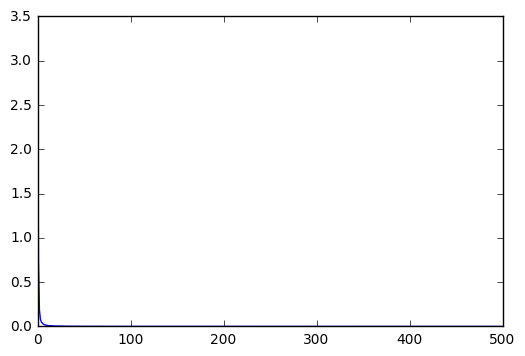

In [275]:
plt.plot(history.history['loss'])

In [235]:
test = pd.read_csv('../datasets/leaves/test.csv')

# Data augmentation (test set)

In [236]:
test['mean_margin'] = test.ix[:, 'margin1':'margin64'].mean(axis=1)
test['mean_shape'] = test.ix[:, 'shape1':'shape64'].mean(axis=1)
test['mean_tex'] = test.ix[:, 'texture1':'texture64'].mean(axis=1)
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture58,texture59,texture60,texture61,texture62,texture63,texture64,mean_margin,mean_shape,mean_tex
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711,0.015625,0.001039,0.015625
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922,0.015625,0.000380,0.015625
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000,0.015625,0.000668,0.015625
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789,0.015625,0.000447,0.015625
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812,0.015625,0.000642,0.015625


In [237]:
test['max_margin'] = test.ix[:, 'margin1':'margin64'].max(axis=1)
test['max_shape'] = test.ix[:, 'shape1':'shape64'].max(axis=1)
test['max_tex'] = test.ix[:, 'texture1':'texture64'].max(axis=1)

test['min_margin'] = test.ix[:, 'margin1':'margin64'].min(axis=1)
test['min_shape'] = test.ix[:, 'shape1':'shape64'].min(axis=1)
test['min_tex'] = test.ix[:, 'texture1':'texture64'].min(axis=1)
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture64,mean_margin,mean_shape,mean_tex,max_margin,max_shape,max_tex,min_margin,min_shape,min_tex
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.053711,0.015625,0.001039,0.015625,0.078125,0.001679,0.112310,0.0,0.000668,0.0
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.044922,0.015625,0.000380,0.015625,0.064453,0.000539,0.058594,0.0,0.000140,0.0
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.000000,0.015625,0.000668,0.015625,0.058594,0.000800,0.218750,0.0,0.000407,0.0
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.008789,0.015625,0.000447,0.015625,0.068359,0.000730,0.102540,0.0,0.000162,0.0
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.007812,0.015625,0.000642,0.015625,0.083984,0.001033,0.138670,0.0,0.000483,0.0


In [238]:
test['M25P'] = test.ix[:, 'margin1':'margin64'].quantile(q=0.25, axis=1)
test['S25P'] = test.ix[:, 'shape1':'shape64'].quantile(q=0.25, axis=1)
test['T25P'] = test.ix[:, 'texture1':'texture64'].quantile(q=0.25, axis=1)

test['M50P'] = test.ix[:, 'margin1':'margin64'].quantile(q=0.5, axis=1)
test['S50P'] = test.ix[:, 'shape1':'shape64'].quantile(q=0.5, axis=1)
test['T50P'] = test.ix[:, 'texture1':'texture64'].quantile(q=0.5, axis=1)

test['M75P'] = test.ix[:, 'margin1':'margin64'].quantile(q=0.75, axis=1)
test['S75P'] = test.ix[:, 'shape1':'shape64'].quantile(q=0.75, axis=1)
test['T75P'] = test.ix[:, 'texture1':'texture64'].quantile(q=0.75, axis=1)

test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,min_tex,M25P,S25P,T25P,M50P,S50P,T50P,M75P,S75P,T75P
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.0,0.001953,0.000778,0.000000,0.007812,0.000998,0.009765,0.021484,0.001280,0.023438
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.0,0.005371,0.000323,0.000000,0.009766,0.000402,0.006836,0.021972,0.000459,0.030517
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.0,0.003906,0.000620,0.000000,0.010743,0.000684,0.000000,0.023438,0.000736,0.010986
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.0,0.003906,0.000368,0.000977,0.009766,0.000461,0.007812,0.025391,0.000527,0.020264
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.0,0.000000,0.000556,0.000977,0.009766,0.000612,0.009278,0.023926,0.000679,0.019775


In [239]:
test['sum_margin'] = test.ix[:, 'margin1':'margin64'].sum(axis=1)
test['sum_shape'] = test.ix[:, 'shape1':'shape64'].sum(axis=1)
test['sum_tex'] = test.ix[:, 'texture1':'texture64'].sum(axis=1)

test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,T25P,M50P,S50P,T50P,M75P,S75P,T75P,sum_margin,sum_shape,sum_tex
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.000000,0.007812,0.000998,0.009765,0.021484,0.001280,0.023438,0.999996,0.066476,1.000008
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.009766,0.000402,0.006836,0.021972,0.000459,0.030517,0.999995,0.024312,1.000001
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.000000,0.010743,0.000684,0.000000,0.023438,0.000736,0.010986,0.999996,0.042751,1.000004
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.000977,0.009766,0.000461,0.007812,0.025391,0.000527,0.020264,0.999995,0.028581,1.000003
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000977,0.009766,0.000612,0.009278,0.023926,0.000679,0.019775,1.000001,0.041067,0.999999


In [240]:
test = StandardScaler().fit(test.ix[:, 'margin1' :]).transform(test.ix[:, 'margin1' :])

In [241]:
test.shape

(594, 213)

In [242]:
preds = model.predict_proba(test)

594/594 [==============================] - 0s     


In [243]:
preds.shape

(594, 99)

# Logistic Regression (Multinomial)

In [624]:
test = pd.read_csv('../datasets/leaves/test.csv')

In [443]:
X_test = pd.DataFrame(columns=train.columns)
X_train = pd.DataFrame(columns=train.columns)
for i in train.species.unique():
    f = train[train.species == i].sample(frac=0.3)
    X_test = pd.concat([X_test, f])
    X_train = pd.concat([X_train, train.loc[~(train.index.isin(f.index)) & (train.species == i)]])

y_train = X_train.species
y_test = X_test.species
X_train.drop('species', axis=1, inplace=True)
X_test.drop('species', axis=1, inplace=True)

X_train = X_train.ix[:, 'margin1' : ]
X_test = X_test.ix[:, 'margin1' : ]

In [603]:
X = train.ix[:, 'margin1':]
y = train.species
y_cat = np_utils.to_categorical(train.species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [604]:
X_test.shape

(198, 192)

In [605]:
#y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [606]:
params = {'C' : [1, 10, 50, 100, 500, 1000, 5000],
         'tol' : [0.001, 0.0001, 0.005, 0.01, 0.1]}

In [607]:
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')

In [608]:
clf = GridSearchCV(lr, params)

In [609]:
clf.fit(X_train.values, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tol': [0.001, 0.0001, 0.005, 0.01, 0.1], 'C': [1, 10, 50, 100, 500, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [610]:
clf.best_params_

{'C': 5000, 'tol': 0.005}

In [611]:
log_loss(y_test, clf.predict_proba(X_test))

0.23365422298604327

In [625]:
preds = clf.predict_proba(test.ix[:, 'margin1':])

In [627]:
preds.shape

(594, 99)

# For submission

In [244]:
sample.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,3.570794e-15,5.068924e-14,3.333742e-18,1.663441e-13,3.073046e-13,1.324952e-12,1.286401e-17,2.101146e-17,1.001121e-15,4.133726e-11,...,2.868411e-18,4.786757e-13,1.404576e-12,2.916086e-16,3.029782e-12,1.504648e-18,6.865830e-18,7.892177e-21,2.082209e-09,1.323107e-15
7,6.480269e-14,8.399383e-13,2.003347e-11,3.616894e-09,2.138198e-13,1.308190e-12,7.288678e-09,2.550569e-14,3.560377e-13,1.943174e-11,...,2.461062e-12,7.084550e-12,3.078640e-14,8.557716e-16,1.732269e-17,1.512588e-09,3.063577e-12,2.902200e-10,8.036566e-15,6.519377e-12
9,1.027247e-09,9.999857e-01,7.409026e-13,4.176988e-13,1.336582e-05,3.585225e-09,3.520091e-11,2.733803e-09,4.540891e-08,9.221444e-08,...,5.725435e-10,1.267766e-14,1.364821e-10,1.824104e-11,6.733689e-14,1.389050e-11,1.519522e-10,8.040749e-17,2.977973e-11,2.142415e-07
12,8.741312e-10,7.370253e-03,9.791224e-10,7.074607e-11,6.366443e-08,1.882778e-09,1.577320e-05,1.763078e-07,4.082189e-06,3.096338e-07,...,5.176812e-07,7.516727e-12,3.326487e-08,9.543778e-11,7.762344e-13,2.028245e-06,2.553052e-04,6.993112e-13,1.793982e-11,3.421646e-06
13,1.407125e-11,1.684223e-09,1.331282e-15,4.042685e-16,1.163314e-09,3.570983e-14,2.854767e-11,5.821290e-12,4.682464e-07,4.366432e-10,...,5.456314e-11,5.298499e-14,6.850484e-09,7.138245e-12,4.481589e-10,4.178762e-12,8.939323e-08,1.035452e-15,1.768571e-10,3.207706e-11


In [245]:
sample = pd.DataFrame(preds, index=pd.read_csv('../datasets/leaves/test.csv')['id'], columns=sorted(spEncoder.classes_))

In [246]:
sample.to_csv('subs/leaves.csv')

In [247]:
sample.shape

(594, 99)

In [248]:
sample.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,1.191413e-13,2.827177e-14,3.499225e-17,1.108897e-14,2.960048e-11,9.367077e-13,1.157114e-17,1.554386e-15,3.131536e-15,1.558842e-11,...,1.432041e-18,1.640118e-12,1.015399e-12,2.072902e-14,2.154850e-12,2.182762e-17,1.393963e-16,5.487838e-18,5.660922e-09,7.474718e-15
7,1.895001e-13,3.142827e-12,1.378233e-10,1.874907e-09,5.976964e-12,5.396288e-12,9.574553e-10,1.217906e-14,3.047077e-14,1.022831e-12,...,2.205375e-12,1.709010e-11,4.396000e-14,4.038504e-16,1.549089e-18,4.441978e-10,2.957221e-12,1.811290e-10,1.228958e-14,7.280429e-12
9,5.613959e-10,9.999824e-01,1.270017e-12,2.098927e-14,1.689857e-05,6.863688e-10,1.229886e-12,1.189864e-08,2.054136e-08,5.958370e-08,...,1.562438e-10,8.989955e-14,2.098151e-10,3.934220e-11,2.527592e-14,3.065328e-12,6.427345e-10,2.355119e-16,2.744381e-11,1.742933e-07
12,4.622021e-09,2.437346e-04,5.940905e-10,2.428052e-11,3.634502e-08,8.244445e-11,2.992024e-05,2.610302e-07,2.426785e-06,2.571995e-07,...,5.007121e-08,1.650094e-11,2.565556e-08,8.034561e-11,2.406547e-12,2.663523e-06,3.355425e-04,7.821906e-13,1.181374e-10,1.360366e-05
13,3.087040e-10,2.036883e-09,5.806066e-15,2.106140e-16,3.926733e-10,8.067603e-14,2.231617e-11,7.245705e-12,9.518231e-07,5.559023e-09,...,4.156302e-10,1.446757e-13,9.487472e-09,1.452254e-12,1.450504e-09,3.227319e-11,1.966102e-07,6.997119e-16,6.269706e-11,1.350295e-12
